In [698]:
import os
import sys
import pandas as pd
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from scipy import stats
import json

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.optimize import curve_fit
import scipy
from functools import reduce
import datetime
import time
import string


In [699]:
### to define for each experiment ###

### import file ###
name = 'JakeSingleTurnover'
data_path = f'C:/Users/jlesinski/Desktop/Biochemistry/biochemtofetch/cis_cleavage_fittingdata/{name}.xlsx'
output_path = f'C:/Users/jlesinski/Desktop/Biochemistry/biochemgraphs/insitu_Figures/{name}.png'
title_name_graph = ''


### plate layout ###
replicate_count = 3

### differentiating between 2 to compare ###
# thing0 = 'Pre-complexed'
# thing1 = 'In-situ'
# number_to_diff_bt = 2



In [700]:
### Functions ###
def convert_to_mins(time):
    time = time.split(':')
    time = int(time[0])*60 + int(time[1]) + int(time[2])/60
    return time

def consective_values(input_list, target_value, num_consective):
    consec = 0
    for i in range(len(input_list)):
        if input_list[i] == target_value:
            consec += 1
        else:
            consec = 0
        if consec == num_consective:
            return True
    return False

def repeat_list(l,repeats):
    new_list = []
    for i in l:
        new_list.append([i]*repeats)
    return new_list

def repeat_list_flattened(l,repeats):
    new_list = []
    for i in l:
        new_list.extend([i]*repeats)
    return new_list

In [701]:
### Create dataframe ###
df_fitting = pd.read_excel(data_path, sheet_name = 'Fit')
df_reps = pd.read_excel(data_path, sheet_name = 'Baselinecorrected')


In [702]:
### Make time column into minutes ###
if 'Time / s' in df_fitting.columns:
    df_fitting = df_fitting.rename(columns = {'Time / s':'Time'})
    df_fitting['Time'] = df_fitting['Time']/60
    df_reps = df_reps.rename(columns = {'Time / s':'Time'})
    df_reps['Time'] = df_reps['Time']/60


### Cut off time at 90 minutes ###
# df_fitting = df_fitting[df_fitting['Time'] <= 60]
df_reps = df_reps[df_reps['Time'] <= 60]

# ### Background subtraction/ Zeroing ###
# df_temp = df
# df_temp = df_temp.drop(columns=['Time'])
# first_row_value = df_temp.iloc[0]
# df_temp = df_temp.subtract(first_row_value)
# df_temp['Time'] = df['Time']
# df = df_temp
# df_to_plot = df



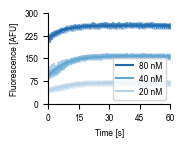

In [703]:
### Plot that shit ###
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

fig = plt.figure()
ax1 = fig.add_subplot()

# font #
# big_title_size = 12
# small_title_size = 12
# axis_size = 10
legend_size = 6
axis_tick_size = 6

plt.rcParams["font.family"] = "Arial"
ax1.tick_params(labelsize=axis_tick_size)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.yticks(fontsize = axis_tick_size)
plt.xticks(fontsize = axis_tick_size)


ocolormap = mpl.colormaps['Blues_r']
palette = ocolormap(np.linspace(0, .7, 4))

eb = ('ci',95)
for column,p in zip(df_reps.columns[:],palette):
    if column != 'Time':
        sns.lineplot(data=df_reps,
                    x='Time',
                    y=column,
                    ax=ax1,
                    # palette=,
                    # hue='red',
                    # style='crRNA',
                    errorbar = eb, 
                    # errwidth= 2,
                    markersize = 5,
                    err_style= 'bars',
                    color = p,  
                    linestyle = '', 
                    marker = 'o',   
                    label = '_nolegend_',
                    alpha = 0.5)
        ax1.set_xlabel('Time [minutes]',fontsize = axis_tick_size)
        ax1.set_ylabel('Fluorescence [AFU]',fontsize = axis_tick_size)


ocolormap = mpl.colormaps['Blues_r']
palette_H = ocolormap(np.linspace(0, .7, 4))

for column,p in zip(df_fitting.columns[:],palette_H):
    if column != 'Time':
        sns.lineplot(data=df_fitting,
                    x='Time',
                    y=column,
                    ax=ax1,
                    # palette=,
                    # hue='red',
                    # style='crRNA',  
                    color = p,     
                    err_style='band',
                    label = column)
        ax1.set_xlabel('Time [minutes]',fontsize = axis_tick_size)
        ax1.set_ylabel('Fluorescence [AFU]',fontsize = axis_tick_size)
        ax1.legend(fontsize = legend_size, loc = 'lower right')

ax1.set_ylim(0,300)
ax1.set_xlim(0,60)
xticks = np.linspace(0,60,5)
plt.xticks(xticks)
yticks = np.linspace(0,300,5)
plt.yticks(yticks)


bbox_inches='tight'
fig.set_size_inches(4/2.54, 3/2.54)
fig.savefig(output_path, bbox_inches='tight', dpi = 600)



In [704]:

# ocolormap = mpl.colormaps['Greens_r']
# palette = ocolormap(np.linspace(0, .7, 7))
# for column,column_plus,c in zip(df_to_plot_thing0.columns[:],df_to_plot_thing0.columns[len(labels_vector):],palette):
#     sns.scatterplot(data=df_to_plot_thing0,
#                 x=column_plus,
#                 y=column,
#                 ax=ax1,
#                 # palette= 'blue',
#                 # style='crRNA',
#                 # ci=99.7,          
#                 #errorbar = ('ci',95),
#                 marker = 'o',
#                 #s=ss,
#                 alpha = 1,
#                 label = column,
#                 c = c)

# ocolormap = mpl.colormaps['Blues_r']
# palette = ocolormap(np.linspace(0, .7, 7))
# for column,column_plus,c in zip(df_to_plot_thing1.columns[:],df_to_plot_thing1.columns[len(labels_vector):],palette):
#     sns.scatterplot(data=df_to_plot_thing1,
#                 x=column_plus,
#                 y=column,
#                 ax=ax1,
#                 # palette= 'blue',
#                 # style='crRNA',
#                 # ci=99.7,          
#                 #errorbar = ('ci',95),
#                 marker = '<',
#                 #s=ss,
#                 alpha = 1,
#                 label = column,
#                 c = c)

In [705]:
# ### import file ###
# directory = 'Desktop/Biochemistry/biochemtofetch/Plate Reader/20042023/'
# filename = '20042023_gRNA_delayfullplate.csv'
# # graphoutput = 'C:/Users/jlesinski/Desktop/Python/pythongraphs'
# graphoutput = 'C:/Users/jlesinski/Desktop/Biochemistry/biochemgraphs/insitu_Figures/'
# outputname = '20042023_gRNA_delayfullplate_bluesR.png'
# df = pd.read_csv(r'C:/Users/jlesinski/'+directory+'/'+filename,skiprows=91, encoding = "ISO-8859-1")
# listuse = pd.Series.tolist(df)



# rep_x_1_index_start = 0
# rep_x_1_index_finish = 119
# ### create time vector ###
# time_col = df.loc[:,"Time"]
# time_col_list = pd.Series.tolist(time_col)
# time_col_list = time_col_list[0:rep_x_1_index_finish+1]
# time_col_list_use =[]
# for i in time_col_list:
# 	if ':' in i:
# 		time_col_list_use.append(i)
# 	else:
# 		break
# ftr = [3600,60,1]
# time_list = []
# for t in time_col_list_use:
# 	time_list.append(sum([a*b for a,b in zip(ftr, map(int,t.split(':')))]))

# time_list_mins = []
# for t in time_list:
#     if t == 0:
#         time_list_mins.append(t)
#     else:
#         time_list_mins.append(int(t/60))

# deltaT_perread = time_list_mins[1]- time_list_mins[0]
# time_list = time_list_mins

# # ###### Time Control #######
# # closeto = min(time, key=lambda x:abs(x-2100))
# # time = list(time)
# # locationofcloseto = time.index(closeto)
# # time = time[0:locationofcloseto]


# ### create 384 plate matrix ###
# listuse_plate = []
# for i in listuse:
# 	listuse_plate.append(i[2:])
# j = np.arange(1,25,1)
# x = []
# for i in j:
# 	x.append(str(i))
# y = list(string.ascii_uppercase)
# y = y[:16]
# xy = []
# for j in y:
# 	for i in x:
# 		xy.append(j+i)
# length = int(len(xy)) # Amount of lists you want to create
# emptylist = []
# for i,j in zip(range(1, length+1),xy):
#     command = "" # This line is here to clear out the previous command
#     command = 'emptylist.append('+str({str(j):[]})+')'
#     exec(command)



# ### create time based vector for each well of plate ###
# for d in listuse_plate:
# 	for data,well,dictname in zip(d,emptylist,xy):
# 		well[dictname].append(data)



# ### Dilution ###
# # In pico molar #
# # concentration = 17.7#[ng/ul]
# # starting_dilution = (3/50)
# # denom_of_dilution = 3
# # number_of_dil = 8 #including initial
# # dilution_vector = [starting_dilution]
# # while len(dilution_vector) < number_of_dil:
# # 	dilution_vector.append(dilution_vector[-1]*(1/denom_of_dilution))
# # dilution_vector = np.array(dilution_vector)
# # dilution_vector = dilution_vector*concentration

# # avg_strand_length = 1000
# # illum_multi = 660 #g/mol
# # conc_nM = []
# # for conc_ngperul in dilution_vector:
# # 	conc_nM.append((conc_ngperul/(illum_multi*avg_strand_length))*(10**6))
# # dilution_vector = conc_nM
# # ### With picomolar concentraiton ###
# # dilution_vector = np.array(dilution_vector)
# # dilution_vector = dilution_vector*1000
# # dilution_vector_pico = []
# # for i in dilution_vector:
# # 	dilution_vector_pico.append(np.round(i,decimals = 5))
# # print(dilution_vector_pico)


# ####################################################################################################################### CHANGE HERE #######################################################################################################################
# ### Merge replicates ###

# # rep_1 = ['B2']
# # rep_2 = ['C2']
# # rep_3 = ['D2']
# # rep_4 = ['E2']



# rep_1 = ['G2','G3','G4']
# rep_2 = ['H2','H3','H4']
# rep_3 = ['I2','I3','I4']
# rep_4 = ['J2','J3','J4']
# rep_5 = ['K2','K3','K4']
# rep_6 = ['L2','L3','L4']
# rep_7 = ['M2','M3','M4']

# rep_8 = ['G6','G7','G8']
# rep_9 = ['H6','H7','H8']
# rep_10 = ['I6','I7','I8']
# rep_11 = ['J6','J7','J8']
# rep_12 = ['K6','K7','K8']
# rep_13 = ['L6','L7','L8']
# rep_14 = ['M6','M7','M8']

# rep_17 = ['B2','B3','B4']
# rep_18 = ['C2','C3','C4']
# rep_15 = ['D2','D3','D4']
# rep_16 = ['E2','E3','E4']


# # rep_15 = ['P21','P22','P23']
# # rep_16 = ['O21','O22','O23']
# # rep_17 = ['N21','N22','N23']
# # rep_18 = ['M21','M22','M23']

# ####################################################################################################################### CHANGE HERE #######################################################################################################################
# # rep_list = [rep_1, rep_2,rep_3, rep_4]
# # rep_list = [rep_1, rep_2,rep_3, rep_4,rep_5, rep_6,rep_7, rep_8,rep_9, rep_10,rep_11,rep_12, rep_13]
# rep_list = [rep_1, rep_2,rep_3, rep_4,rep_5, rep_6,rep_7, rep_8,rep_9, rep_10,rep_11,rep_12, rep_13, rep_14, rep_15,rep_16, rep_17, rep_18]
# # rep_list = [rep_1]

# for e,number in zip(range(len(rep_list)),enumerate(rep_list)):
# 	command = "" # This line is here to clear out the previous command
# 	command = 'replicate_'+str(number[0]+1)+ '=[]'
# 	exec(command)

# ####################################################################################################################### CHANGE HERE #######################################################################################################################
# # replicate_list = [replicate_1, replicate_2, replicate_3, replicate_4]
# replicate_list = [replicate_1, replicate_2,replicate_3, replicate_4,replicate_5,replicate_6, replicate_7,replicate_8, replicate_9,replicate_10,replicate_11, replicate_12,replicate_13, replicate_14,replicate_15, replicate_16,replicate_17,replicate_18]
# # replicate_list = [replicate_1]

# list_of_lists = [time_list*len(rep_1)]
# time = []
# for sublist in list_of_lists:
#     for item in sublist:
#         time.append(item)


# for rep,replicate in zip(rep_list,replicate_list):
# 	list_of_lists = []
# 	for r in rep:
# 		list_of_lists.append(emptylist[xy.index(r)][r][:len(time_list)])
# 	for sublist in list_of_lists:
# 	    for item in sublist:
# 	    	if item == 'OVRFLW':
# 	    		replicate.append(float(100000))
#     		else:
# 	        	replicate.append(float(item))

# # for e,number in zip(range(len(rep_list)),enumerate(rep_list)):
# # 	command = "" # This line is here to clear out the previous command
# # 	command = 'replicate_'+str(number[0]+1)+ '=[]'
# # 	exec(command)

# replicate_list_name = []
# for i,num in zip(range(len(rep_list)),enumerate(rep_list)):
# 	replicate_list_name.append('rep'+str(num[0]+1))

# for rep_name,replicate,number in zip(replicate_list_name,replicate_list,enumerate(replicate_list)):
# 	rep_temp = {rep_name:replicate,'time':time}
# 	command = "" # This line is here to clear out the previous command
# 	command = 'df_rep_'+str(number[0]+1)+'=pd.DataFrame(data=rep_temp)'
# 	exec(command)
# #########################################################################################################################
# print("before zeroing: ")
# for i in range(4):
#      print(df_rep_1['rep1'].iat[i])
     


# ####################################################################################################################### CHANGE HERE #######################################################################################################################
# rep_x_2_index_start = rep_x_1_index_finish+1
# rep_x_2_index_finish = rep_x_2_index_start+rep_x_1_index_finish
# rep_x_3_index_start = rep_x_2_index_finish+1
# rep_x_3_index_finish = rep_x_3_index_start+rep_x_1_index_finish



# ####################################################################################################################### CHANGE HERE #######################################################################################################################
# #starting_point
# df_rep_1_sp = df_rep_1['rep1'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_1['rep1'].iat[i] = df_rep_1['rep1'].iat[i]-df_rep_1_sp


# df_rep_1_sp = df_rep_1['rep1'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_1['rep1'].iat[i] = df_rep_1['rep1'].iat[i]-df_rep_1_sp
    
# df_rep_1_sp = df_rep_1['rep1'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_1['rep1'].iat[i] = df_rep_1['rep1'].iat[i]-df_rep_1_sp


# ##################rep2###################################

# df_rep_2_sp = df_rep_2['rep2'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_2['rep2'].iat[i] = df_rep_2['rep2'].iat[i]-df_rep_2_sp


# df_rep_2_sp = df_rep_2['rep2'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_2['rep2'].iat[i] = df_rep_2['rep2'].iat[i]-df_rep_2_sp
    

# df_rep_2_sp = df_rep_2['rep2'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_2['rep2'].iat[i] = df_rep_2['rep2'].iat[i]-df_rep_2_sp


# ##################rep3###################################

# df_rep_3_sp = df_rep_3['rep3'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_3['rep3'].iat[i] = df_rep_3['rep3'].iat[i]-df_rep_3_sp


# df_rep_3_sp = df_rep_3['rep3'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_3['rep3'].iat[i] = df_rep_3['rep3'].iat[i]-df_rep_3_sp
    
# df_rep_3_sp = df_rep_3['rep3'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_3['rep3'].iat[i] = df_rep_3['rep3'].iat[i]-df_rep_3_sp


# ##################rep4###################################

# df_rep_4_sp = df_rep_4['rep4'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_4['rep4'].iat[i] = df_rep_4['rep4'].iat[i]-df_rep_4_sp


# df_rep_4_sp = df_rep_4['rep4'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_4['rep4'].iat[i] = df_rep_4['rep4'].iat[i]-df_rep_4_sp
    
# df_rep_4_sp = df_rep_4['rep4'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_4['rep4'].iat[i] = df_rep_4['rep4'].iat[i]-df_rep_4_sp

# ##################rep5###################################

# df_rep_5_sp = df_rep_5['rep5'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_5['rep5'].iat[i] = df_rep_5['rep5'].iat[i]-df_rep_5_sp


# df_rep_5_sp = df_rep_5['rep5'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_5['rep5'].iat[i] = df_rep_5['rep5'].iat[i]-df_rep_5_sp
    
# df_rep_5_sp = df_rep_5['rep5'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_5['rep5'].iat[i] = df_rep_5['rep5'].iat[i]-df_rep_5_sp

# ##################rep6###################################

# df_rep_6_sp = df_rep_6['rep6'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_6['rep6'].iat[i] = df_rep_6['rep6'].iat[i]-df_rep_6_sp


# df_rep_6_sp = df_rep_6['rep6'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_6['rep6'].iat[i] = df_rep_6['rep6'].iat[i]-df_rep_6_sp
    
# df_rep_6_sp = df_rep_6['rep6'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_6['rep6'].iat[i] = df_rep_6['rep6'].iat[i]-df_rep_6_sp

# ##################rep7###################################

# df_rep_7_sp = df_rep_7['rep7'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_7['rep7'].iat[i] = df_rep_7['rep7'].iat[i]-df_rep_7_sp


# df_rep_7_sp = df_rep_7['rep7'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_7['rep7'].iat[i] = df_rep_7['rep7'].iat[i]-df_rep_7_sp
    
# df_rep_7_sp = df_rep_7['rep7'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_7['rep7'].iat[i] = df_rep_7['rep7'].iat[i]-df_rep_7_sp

# ##################rep8###################################

# df_rep_8_sp = df_rep_8['rep8'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_8['rep8'].iat[i] = df_rep_8['rep8'].iat[i]-df_rep_8_sp


# df_rep_8_sp = df_rep_8['rep8'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_8['rep8'].iat[i] = df_rep_8['rep8'].iat[i]-df_rep_8_sp
    
# df_rep_8_sp = df_rep_8['rep8'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_8['rep8'].iat[i] = df_rep_8['rep8'].iat[i]-df_rep_8_sp

# ##################rep9###################################

# df_rep_9_sp = df_rep_9['rep9'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_9['rep9'].iat[i] = df_rep_9['rep9'].iat[i]-df_rep_9_sp


# df_rep_9_sp = df_rep_9['rep9'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_9['rep9'].iat[i] = df_rep_9['rep9'].iat[i]-df_rep_9_sp
    
# df_rep_9_sp = df_rep_9['rep9'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_9['rep9'].iat[i] = df_rep_9['rep9'].iat[i]-df_rep_9_sp

# ##################rep10###################################

# df_rep_10_sp = df_rep_10['rep10'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_10['rep10'].iat[i] = df_rep_10['rep10'].iat[i]-df_rep_10_sp


# df_rep_10_sp = df_rep_10['rep10'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_10['rep10'].iat[i] = df_rep_10['rep10'].iat[i]-df_rep_10_sp
    
# df_rep_10_sp = df_rep_10['rep10'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_10['rep10'].iat[i] = df_rep_10['rep10'].iat[i]-df_rep_10_sp

# ##################rep11###################################

# df_rep_11_sp = df_rep_11['rep11'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_11['rep11'].iat[i] = df_rep_11['rep11'].iat[i]-df_rep_11_sp


# df_rep_11_sp = df_rep_11['rep11'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_11['rep11'].iat[i] = df_rep_11['rep11'].iat[i]-df_rep_11_sp
    
# df_rep_11_sp = df_rep_11['rep11'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_11['rep11'].iat[i] = df_rep_11['rep11'].iat[i]-df_rep_11_sp

# ##################rep12###################################

# df_rep_12_sp = df_rep_12['rep12'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_12['rep12'].iat[i] = df_rep_12['rep12'].iat[i]-df_rep_12_sp


# df_rep_12_sp = df_rep_12['rep12'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_12['rep12'].iat[i] = df_rep_12['rep12'].iat[i]-df_rep_12_sp
    
# df_rep_12_sp = df_rep_12['rep12'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_12['rep12'].iat[i] = df_rep_12['rep12'].iat[i]-df_rep_12_sp

# ##################rep13###################################

# df_rep_13_sp = df_rep_13['rep13'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_13['rep13'].iat[i] = df_rep_13['rep13'].iat[i]-df_rep_13_sp


# df_rep_13_sp = df_rep_13['rep13'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_13['rep13'].iat[i] = df_rep_13['rep13'].iat[i]-df_rep_13_sp
    
# df_rep_13_sp = df_rep_13['rep13'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_13['rep13'].iat[i] = df_rep_13['rep13'].iat[i]-df_rep_13_sp

# ##################rep14###################################

# df_rep_14_sp = df_rep_14['rep14'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_14['rep14'].iat[i] = df_rep_14['rep14'].iat[i]-df_rep_14_sp


# df_rep_14_sp = df_rep_14['rep14'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_14['rep14'].iat[i] = df_rep_14['rep14'].iat[i]-df_rep_14_sp
    
# df_rep_14_sp = df_rep_14['rep14'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_14['rep14'].iat[i] = df_rep_14['rep14'].iat[i]-df_rep_14_sp

# ##################rep15###################################

# df_rep_15_sp = df_rep_15['rep15'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_15['rep15'].iat[i] = df_rep_15['rep15'].iat[i]-df_rep_15_sp


# df_rep_15_sp = df_rep_15['rep15'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_15['rep15'].iat[i] = df_rep_15['rep15'].iat[i]-df_rep_15_sp
    
# df_rep_15_sp = df_rep_15['rep15'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_15['rep15'].iat[i] = df_rep_15['rep15'].iat[i]-df_rep_15_sp

# ##################rep16###################################

# df_rep_16_sp = df_rep_16['rep16'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_16['rep16'].iat[i] = df_rep_16['rep16'].iat[i]-df_rep_16_sp


# df_rep_16_sp = df_rep_16['rep16'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_16['rep16'].iat[i] = df_rep_16['rep16'].iat[i]-df_rep_16_sp
    
# df_rep_16_sp = df_rep_16['rep16'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_16['rep16'].iat[i] = df_rep_16['rep16'].iat[i]-df_rep_16_sp

# ##################rep17###################################

# df_rep_17_sp = df_rep_17['rep17'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_17['rep17'].iat[i] = df_rep_17['rep17'].iat[i]-df_rep_17_sp


# df_rep_17_sp = df_rep_17['rep17'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_17['rep17'].iat[i] = df_rep_17['rep17'].iat[i]-df_rep_17_sp
    
# df_rep_17_sp = df_rep_17['rep17'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_17['rep17'].iat[i] = df_rep_17['rep17'].iat[i]-df_rep_17_sp

# ##################rep18###################################

# df_rep_18_sp = df_rep_18['rep18'].iat[0]
# for i in range(rep_x_1_index_start,rep_x_1_index_finish):
#     df_rep_18['rep18'].iat[i] = df_rep_18['rep18'].iat[i]-df_rep_18_sp


# df_rep_18_sp = df_rep_18['rep18'].iat[rep_x_2_index_start]

# for i in range(rep_x_2_index_start,rep_x_2_index_finish):
#     df_rep_18['rep18'].iat[i] = df_rep_18['rep18'].iat[i]-df_rep_18_sp
    
# df_rep_18_sp = df_rep_18['rep18'].iat[rep_x_3_index_start]

# for i in range(rep_x_3_index_start,rep_x_3_index_finish):
#     df_rep_18['rep18'].iat[i] = df_rep_18['rep18'].iat[i]-df_rep_18_sp








# ####################################################################################################################### CHANGE HERE #######################################################################################################################

# eb = ('ci',95)
# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# # ax3 = fig.add_subplot(223)
# # ax4 = fig.add_subplot(224)
# # ax5 = fig.add_subplot(325)
# # ax6 = fig.add_subplot(236)
# # fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)


# sns.lineplot(data=df_rep_1,
#              x='time',
#              y='rep1',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,
#              err_style='band')
#             #  label = '200,000 cp/uL')
# sns.lineplot(data=df_rep_2,
#              x='time',
#              y='rep2',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = '20,000 cp/uL')
# sns.lineplot(data=df_rep_3,
#              x='time',
#              y='rep3',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = '2,000 cp/uL')
# sns.lineplot(data=df_rep_4,
#              x='time',
#              y='rep4',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = '200 cp/uL')
# sns.lineplot(data=df_rep_5,
#              x='time',
#              y='rep5',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,         
#              err_style='band')
#             #  label = '20 cp/uL')
# sns.lineplot(data=df_rep_6,
#              x='time',
#              y='rep6',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = '2 cp/uL')
# sns.lineplot(data=df_rep_7,
#              x='time',
#              y='rep7',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = '0.2 cp/uL')

# sns.lineplot(data=df_rep_15,
#              x='time',
#              y='rep15',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,         
#              err_style='band')
#             #  label = 'Negative')
# sns.lineplot(data=df_rep_16,
#              x='time',
#              y='rep16',
#              ax=ax1,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band')
#             #  label = 'Negative - NSDC')

# ########
# # font #
# big_title_size = 9
# small_title_size = 9
# axis_size = 8
# legend_size = 6
# axis_tick_size = 6
# plt.rcParams["font.family"] = "Arial"

# ax1.set_title('One-Pot Standard',fontsize = small_title_size)
# ax1.tick_params(labelsize=axis_tick_size)
# ax1.spines['right'].set_visible(False)
# ax1.spines['top'].set_visible(False)

# # x-axis #
# endtime = 180
# ax1.set_xlabel('Time [Minutes]',fontsize = axis_size)
# ticks_x = np.linspace(0,endtime,5)
# ax1.set_xticks(ticks= ticks_x)
# ax1.set_xlim([0,endtime])

# # y-axis #
# max_fluor = 85000
# ax1.set_ylabel('Fluorescence [AFU]',fontsize = axis_size)
# ticks_y = np.linspace(0,max_fluor,5)
# ax1.set_yticks(ticks= ticks_y)
# ax1.set_ylim([0,max_fluor])

# # both/general #
# ax1.tick_params(axis='both', labelsize=axis_tick_size, direction='out', which='both')
# # palette = reversed(sns.color_palette("Blues"))
# # sns.set_palette(palette = palette, n_colors = 9)
# # ax1.legend.set_visible(False)
# # ax1.get_legend().remove()
# #########

# sns.lineplot(data=df_rep_8,
#              x='time',
#              y='rep8',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = '200,000 cp/uL')
# sns.lineplot(data=df_rep_9,
#              x='time',
#              y='rep9',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = '20,000 cp/uL')
# sns.lineplot(data=df_rep_10,
#              x='time',
#              y='rep10',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = '2,000 cp/uL')
# sns.lineplot(data=df_rep_11,
#              x='time',
#              y='rep11',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = '200 cp/uL')
# sns.lineplot(data=df_rep_12,
#              x='time',
#              y='rep12',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,         
#              err_style='band',
#              label = '20 cp/uL')
# sns.lineplot(data=df_rep_13,
#              x='time',
#              y='rep13',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = '2 cp/uL')
# sns.lineplot(data=df_rep_14,
#              x='time',
#              y='rep14',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,       
#              err_style='band',
#              label = '0.2 cp/uL')

# sns.lineplot(data=df_rep_17,
#              x='time',
#              y='rep17',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = 'Negative')
# sns.lineplot(data=df_rep_18,
#              x='time',
#              y='rep18',
#              ax=ax2,
#              # hue='red',
#              # style='crRNA',
#              errorbar = eb,        
#              err_style='band',
#              label = 'Negative - NSDC')


# ########
# # font #
# big_title_size = 9
# small_title_size = 9
# axis_size = 8
# legend_size = 6
# axis_tick_size = 6
# plt.rcParams["font.family"] = "Arial"

# ax2.set_title('In-Situ Complex One-Pot',fontsize = small_title_size)
# ax2.tick_params(labelsize=axis_tick_size)
# ax2.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)

# # x-axis #
# endtime = 180
# ax2.set_xlabel('Time [Minutes]',fontsize = axis_size)
# ticks_x = np.linspace(0,endtime,5)
# ax2.set_xticks(ticks= ticks_x)
# ax2.set_xlim([0,endtime])

# # y-axis #
# max_fluor = 85000
# ax2.set_ylabel('Fluorescence [AFU]',fontsize = axis_size)
# ticks_y = np.linspace(0,max_fluor,5)
# ax2.set_yticks(ticks= ticks_y)
# ax2.set_ylim([0,max_fluor])

# # both/general #
# ax2.tick_params(axis='both', labelsize=axis_tick_size, direction='out', which='both')
# ax2.get_legend().remove()

# # palette = plt.get_cmap('Blues').reversed()
# # palette = list(set([palette(a) for a in np.linspace(0,1,9)]))
# # sns.set_palette(palette = palette)

# sns.set_palette("Blues_r", n_colors=9)
# # ax2.legend(fontsize = legend_size, loc = "outside lower left", mode = "expand", borderaxespad = 0, ncol = 9)
# # ax2.legend(fontsize = legend_size, bbox_to_anchor=(0, 1.02, 1, 0.2), loc = "outside lower left", mode = "expand", borderaxespad = 0, ncol = 9)
# #########


# # sns.lineplot(data=df_rep_3,
# #              x='time',
# #              y='rep3',
# #              ax=ax3,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Uncomplexed - NEB2.1 - 5cp/uL')

# # sns.lineplot(data=df_rep_6,
# #              x='time',
# #              y='rep6',
# #              ax=ax3,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Uncomplexed - Holmes - 5cp/uL')

# # sns.lineplot(data=df_rep_9,
# #              x='time',
# #              y='rep9',
# #              ax=ax3,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Precomplexed - NEB2.1 - 5cp/uL')

# # sns.lineplot(data=df_rep_12,
# #              x='time',
# #              y='rep12',
# #              ax=ax3,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Precomplexed - Holmes - 5cp/uL')

# # ax3.set_xlabel('Time [s]',fontsize = 5)
# # ax3.set_ylabel('Fluorescence [AFU]',fontsize = 5)
# # ax3.legend(fontsize = 3)
# # ax3.set_xlim([0, 13500])
# # ax3.set_title('5 cp/uL',fontsize = 7)
# # #ax2.set_yticks(np.arange(0,10000,1000))
# # ax3.tick_params(labelsize=5)

# # sns.lineplot(data=df_rep_1,
# #              x='time',
# #              y='rep1',
# #              ax=ax4,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Uncomplexed - NEB2.1 - Negative')

# # sns.lineplot(data=df_rep_4,
# #              x='time',
# #              y='rep4',
# #              ax=ax4,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Uncomplexed - Holmes - Negative')

# # sns.lineplot(data=df_rep_7,
# #              x='time',
# #              y='rep7',
# #              ax=ax4,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Precomplexed - NEB2.1 - Negative')

# # sns.lineplot(data=df_rep_10,
# #              x='time',
# #              y='rep10',
# #              ax=ax4,
# #              # hue='red',
# #              # style='crRNA',
# #              ci='sd',          
# #              err_style='band',
# #              label = 'Precomplexed - Holmes - Negative')

# # ax4.set_xlabel('Time [s]',fontsize = 5)
# # ax4.set_ylabel('Fluorescence [AFU]',fontsize = 5)
# # ax4.legend(fontsize = 3)
# # ax4.set_xlim([0, 13500])
# # ax4.set_title('Negatives',fontsize = 7)
# # #ax2.set_yticks(np.arange(0,10000,1000))
# # ax4.tick_params(labelsize=5)





# plt.tight_layout()
# # #4 ###Output###
# # plt.show()
# fig.legend(fontsize = legend_size, loc = "outside lower center", mode = "expand", ncol = 9,frameon=False, borderaxespad = 0)
# fig.savefig(graphoutput+outputname, dpi = 600, transparent = False)

# plot shit